In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")
from sklearn.metrics import r2_score
import diversity_tools as dt

In [5]:
selected_cbg_brand = pd.read_csv('selected_cbg_brand.csv', index_col = 'cbg')
selected_brands = pd.read_csv('selected_brands.csv')
brand_cat = pd.read_csv('brand_cat.csv')
brand_median = pd.read_csv('brand_median.csv')
yelp_labelled = pd.read_csv('yelp_labelled.csv')
cbg_edu = pd.read_csv('cbg_edu.csv', index_col = 'cbg')
cbg_diversity = pd.read_csv('cbg_diversity.csv', index_col = 'cbg')

In [6]:
edu_diversity = pd.merge(cbg_edu, cbg_diversity, left_index = True, right_index = True)

In [7]:
edu_diversity.corr()

,bachelor_or_higher,years_edu_weighted,nbrands,entropy_brand,brand_range,brand_std,nlevels,entropy_price
bachelor_or_higher,1.000000,0.891273,0.112271,0.135449,0.282334,0.377040,0.259610,0.388323
years_edu_weighted,0.891273,1.000000,0.095939,0.088507,0.176047,0.259229,0.155352,0.240861
nbrands,0.112271,0.095939,1.000000,0.917446,0.505774,0.326398,0.461143,0.265244
entropy_brand,0.135449,0.088507,0.917446,1.000000,0.542273,0.402712,0.494145,0.372704
brand_range,0.282334,0.176047,0.505774,0.542273,1.000000,0.811241,0.395328,0.406363
brand_std,0.377040,0.259229,0.326398,0.402712,0.811241,1.000000,0.359924,0.460813
nlevels,0.259610,0.155352,0.461143,0.494145,0.395328,0.359924,1.000000,0.742248
entropy_price,0.388323,0.240861,0.265244,0.372704,0.406363,0.460813,0.742248,1.000000


In [8]:
edu_diversity.corr().to_excel("Appendix/edu_diversity.xlsx")

In [9]:
stats.pearsonr(edu_diversity['bachelor_or_higher'], edu_diversity['entropy_brand'])

(0.1354486922136603, 8.983738630115938e-57)

In [10]:
def plot_edu_diversity(edu_diversity):
    """"""    

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, constrained_layout = True, figsize=(9.5, 3))
    axs = [ax1,ax2,ax3]
    x = edu_diversity["bachelor_or_higher"]
    y = [edu_diversity['entropy_brand'], edu_diversity['brand_std'], edu_diversity['entropy_price']]
    xlabels = ["bachelor_or_higher", "bachelor_or_higher", "bachelor_or_higher"]
    ylabels = ["entropy by brand visits", "standard deviation of brand SES", "entropy by price levels"]
    titles = ["a", "b", "c"]
    

    for i in range(len(axs)):
        axs[i].scatter(x, y[i], s = 5, alpha = 0.3)
        b, e = np.polyfit(x, y[i], 1)
        axs[i].plot(x, b*x + e, color="black", linewidth = 1.5)
        axs[i].set_xlabel(xlabels[i])
        axs[i].set_ylabel(ylabels[i])
        axs[i].set_title(titles[i])
        axs[i].xaxis.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[i].set_xticklabels(["0", "0.2", "0.4", "0.6", "0.8", "1"])

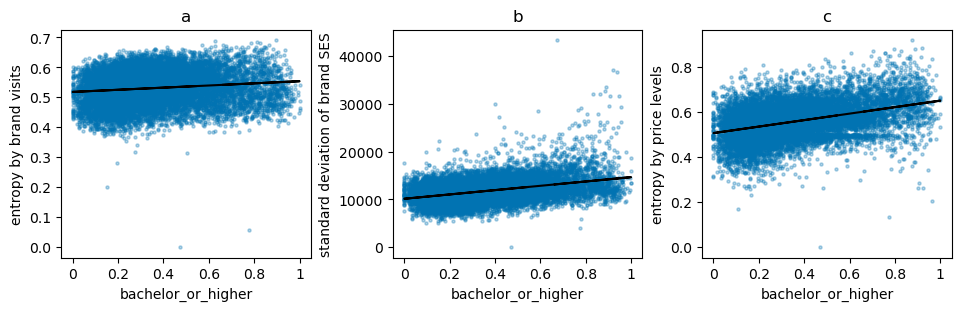

In [11]:
plot_edu_diversity(edu_diversity)

# by industry (naics 3 digits)

In [12]:
selected_brand_cat3d = pd.read_csv('selected_brand_cat3d.csv')

## get some category stats

In [13]:
# industry brand SES and price level variations
cat_stats = selected_brand_cat3d[['brands', 'naics3_category']].merge(brand_median, on = 'brands')
cat_stats = cat_stats.merge(yelp_labelled, on = 'brands')
cat_stats = cat_stats.set_index('brands').groupby('naics3_category').std()
# number of brands in each industry
cat_stats.insert(0, 'nbrands', selected_brand_cat3d.groupby('naics3_category').size())

In [14]:
cat_stats

,nbrands,median,yelp_dollar
naics3_category,,,
"Amusement, Gambling, and Recreation Industries",89,19292.316477,1.035098
Clothing and Clothing Accessories Stores,199,19678.848911,0.760824
Food Services and Drinking Places,297,18716.766632,0.663137
Food and Beverage Stores,95,30808.307041,0.640352
Gasoline Stations,34,11877.534167,0.512348
General Merchandise Stores,42,20957.461603,0.935088
Health and Personal Care Stores,47,14368.099852,0.493548
Miscellaneous Store Retailers,49,24731.021362,0.598017
Motion Picture and Video Industries,9,21737.220590,NaN


## three measures in each cat to report in paper
excluding Personal and Laundry Services(812) and Rental and Leasing Services(532) due to limited number of brands

In [15]:
industries = cat_stats[cat_stats['nbrands'] > 5].index.values

In [16]:
def naics3_matrix(naics3_category):
    """"""
    naics3_brands = selected_brand_cat3d['brands'][selected_brand_cat3d['naics3_category'] == naics3_category]
    matrix = selected_cbg_brand[selected_cbg_brand.columns.intersection(naics3_brands)]
    return matrix

def naics3_diversity(naics3_category):
    """"""
    matrix = naics3_matrix(naics3_category)
    diversity = dt.get_3diversity(matrix)
    return diversity

In [17]:
# create an empty dataframe to be filled in 
columns = ['naics3_category', 'entropy_brand', 'brand_std', 'entropy_price']
cat_diverstiy = pd.DataFrame(columns = columns)
significance_levels = [.05, .01, .001]


for cat in industries:
    # get the diversity measures
    df = naics3_diversity(cat)
    df = df.merge(cbg_edu, left_index = True, right_index = True)
    # statistical significance denoted in asterisks
    row = [cat]
    # dealing with one exception 
    measures = ['entropy_brand', 'brand_std'] if cat == "Motion Picture and Video Industries" else ['entropy_brand', 'brand_std', 'entropy_price']
    for measure in measures:
        filtered_df = df.dropna(subset=[measure])
        r, p = stats.pearsonr(filtered_df['bachelor_or_higher'], filtered_df[measure])
        p_value_sign = ''.join(['*' for t in significance_levels if p <= t])
        value = f"{r.round(3)}{p_value_sign}"
        row.append(value)
    if cat ==  "Motion Picture and Video Industries":
        row.append("-")

    cat_diverstiy.loc[len(cat_diverstiy)] = row


In [18]:
cat_diverstiy

,naics3_category,entropy_brand,brand_std,entropy_price
0,"Amusement, Gambling, and Recreation Industries",0.28***,0.219***,0.082***
1,Clothing and Clothing Accessories Stores,0.143***,0.051***,0.224***
2,Food Services and Drinking Places,0.142***,0.341***,0.429***
3,Food and Beverage Stores,-0.062***,0.037***,0.0
4,Gasoline Stations,-0.118***,-0.107***,-0.07***
5,General Merchandise Stores,-0.152***,0.052***,0.112***
6,Health and Personal Care Stores,0.035***,0.089***,0.089***
7,Miscellaneous Store Retailers,0.131***,0.103***,0.014
8,Motion Picture and Video Industries,0.046*,0.014,-
9,"Sporting Goods, Hobby, Musical Instrument, and...",0.109***,0.145***,0.08***


In [19]:
cat_div_report = cat_diverstiy.merge(cat_stats, left_on = 'naics3_category', right_index = True).set_index('naics3_category')
cat_div_report['entropy_brand_number'] = cat_div_report['entropy_brand'].str.strip('*').astype(float)
cat_div_report = cat_div_report.sort_values(by = "entropy_brand_number", ascending = False)

In [20]:
cat_div_report

,entropy_brand,brand_std,entropy_price,nbrands,median,yelp_dollar,entropy_brand_number
naics3_category,,,,,,,
"Amusement, Gambling, and Recreation Industries",0.28***,0.219***,0.082***,89,19292.316477,1.035098,0.280
Clothing and Clothing Accessories Stores,0.143***,0.051***,0.224***,199,19678.848911,0.760824,0.143
Food Services and Drinking Places,0.142***,0.341***,0.429***,297,18716.766632,0.663137,0.142
Miscellaneous Store Retailers,0.131***,0.103***,0.014,49,24731.021362,0.598017,0.131
"Sporting Goods, Hobby, Musical Instrument, and Book Stores",0.109***,0.145***,0.08***,53,25422.044004,0.592132,0.109
Motion Picture and Video Industries,0.046*,0.014,-,9,21737.220590,NaN,0.046
Health and Personal Care Stores,0.035***,0.089***,0.089***,47,14368.099852,0.493548,0.035
Food and Beverage Stores,-0.062***,0.037***,0.0,95,30808.307041,0.640352,-0.062
Gasoline Stations,-0.118***,-0.107***,-0.07***,34,11877.534167,0.512348,-0.118


In [18]:
# cat_div_report.to_excel("Tables/cat_div_report.xlsx")

# NYC vs other

In [19]:
cbg_fips_codes = pd.read_csv('../SafeGraph_data/safegraph_open_census_data_2019/metadata/cbg_fips_codes.csv')

In [20]:
codes = cbg_fips_codes[cbg_fips_codes['state'] == 'NY']
codes['state_fips'].unique()

array([36])

In [21]:
codes[codes['county'].isin(['New York County', 'Kings County', 'Bronx County',
                           'Richmond County', 'Queens County'])]

,state,state_fips,county_fips,county,class_code
1830,NY,36,5,Bronx County,H6
1851,NY,36,47,Kings County,H6
1858,NY,36,61,New York County,H6
1868,NY,36,81,Queens County,H6
1870,NY,36,85,Richmond County,H6


## get different matrices

In [22]:
NYC_codes = ['36005', '36047', '36061', '36081', '36085']
# get the first 5 numbers of the strings
cbg5strings = selected_cbg_brand.index.astype(str).str.slice(0,5)
# nyc cbg to all poi
nyc_all = selected_cbg_brand[cbg5strings.isin(NYC_codes)]
# non-nyc cbg to all poi
nnyc_all = selected_cbg_brand[cbg5strings.isin(NYC_codes) == False]

In [23]:
# get the poi in NYC or not
def unpack_to_matrix(unpack):
    """"""
    matrix = unpack.drop(['placekey', 'city'], axis = 1)
    matrix = matrix.groupby(['visitor_home_cbgs', 'brands']).sum().unstack()
    matrix = matrix.fillna(0)
    matrix.columns = matrix.columns.droplevel(0)
    matrix.index.name = 'cbg'
    matrix.index = matrix.index.astype(int)
    
    return matrix

def get_all2_matrices():
    """"""
    # get poi city data
    NY_brands = pd.read_csv('NY_brands.csv')
    cbg_unpack = pd.read_csv('cbg_unpack.csv')
    POI_city = NY_brands[['placekey', 'city']]
    # merge city with unpack data (poi-cbg pairs)
    unpack_city = pd.merge(cbg_unpack, POI_city, on = 'placekey')
    # select brands and cbgs in our sample
    unpack_city = unpack_city[unpack_city['brands'].isin(selected_brands['brands'])]
    unpack_city = unpack_city[unpack_city['visitor_home_cbgs'].isin(selected_cbg_brand.index.values.astype(str))]
    # select poi-brand pair based on NYC or not
    NYC_unpack = unpack_city[unpack_city['city'] == "New York"]
    nNYC_unpack = unpack_city[unpack_city['city'] != "New York"]
    # get the matrices
    all_nyc = unpack_to_matrix(NYC_unpack)
    all_nnyc = unpack_to_matrix(nNYC_unpack)
    return all_nyc, all_nnyc

In [24]:
all_nyc, all_nnyc = get_all2_matrices()

In [25]:
# nyc to nyc
cbg5strings = all_nyc.index.astype(str).str.slice(0,5)
nyc_nyc = all_nyc[cbg5strings.isin(NYC_codes)]

# nnyc to nnyc
cbg5strings = all_nnyc.index.astype(str).str.slice(0,5)
nnyc_nnyc = all_nnyc[cbg5strings.isin(NYC_codes) == False]

## get diversity measures

In [26]:
matrices = [nyc_all, nyc_nyc, nnyc_all, nnyc_nnyc]

# create an empty dataframe to be filled in 
measures = ['entropy_brand', 'brand_std', 'entropy_price']
nyc_div_report = pd.DataFrame(columns = measures)
significance_levels = [.05, .01, .001]

for matrix in matrices:
    df = dt.get_3diversity(matrix)
    df = df.merge(cbg_edu, left_index = True, right_index = True)
    row = []
    for measure in measures:
        filtered_df = df.dropna(subset=[measure])
        r, p = stats.pearsonr(filtered_df['bachelor_or_higher'], filtered_df[measure])
        p_value_sign = ''.join(['*' for t in significance_levels if p <= t])
        value = f"{r.round(3)}{p_value_sign}"
        row.append(value)
    
    nyc_div_report.loc[len(nyc_div_report)] = row

# set index values
nyc_div_report.index = ["nyc_all", "nyc_nyc", "nnyc_all", "nnyc_nnyc"]

In [27]:
nyc_div_report

,entropy_brand,brand_std,entropy_price
nyc_all,-0.155***,0.171***,0.262***
nyc_nyc,0.287***,0.089***,0.103***
nnyc_all,0.309***,0.494***,0.498***
nnyc_nnyc,0.211***,0.49***,0.47***


In [28]:
# nyc_div_report.to_excel("Tables/nyc_div_report.xlsx")

# explore negatively associated industries

In [35]:
food = naics3_diversity("Food and Beverage Stores")
food = food.merge(cbg_edu, left_index = True, right_index = True)

In [36]:
food

,entropy_brand,brand_std,entropy_price,bachelor_or_higher
cbg,,,,
100030145022,NaN,NaN,NaN,0.663636
120110105032,0.000000,0.000000,0.000000,0.669315
120950171031,0.147789,19904.036013,0.485475,0.611820
120950171032,0.241248,5568.488419,0.000000,0.527488
120970408021,0.000000,0.000000,0.000000,0.350919
...,...,...,...,...
421179504001,0.000000,0.000000,0.000000,0.147016
421179505003,0.239978,1501.863321,0.445246,0.160767
421179506002,0.228316,17561.951911,0.405639,0.435115


<Axes: xlabel='bachelor_or_higher', ylabel='entropy_price'>

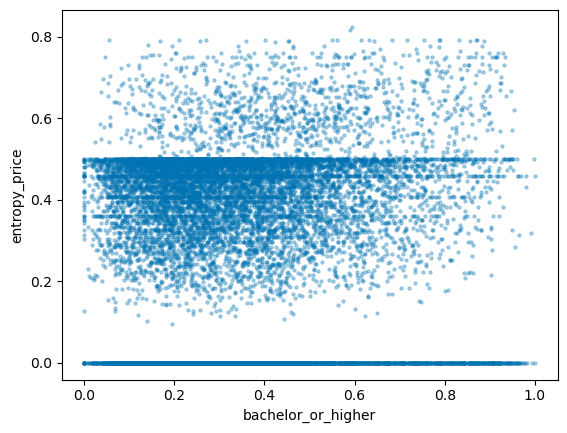

In [37]:
food.plot.scatter(x = 'bachelor_or_higher', y = 'entropy_price', s = 5, alpha = 0.3)

In [39]:
filtered = food.dropna(subset=['entropy_price'])

In [41]:
filtered

,entropy_brand,brand_std,entropy_price,bachelor_or_higher
cbg,,,,
120110105032,0.000000,0.000000,0.000000,0.669315
120950171031,0.147789,19904.036013,0.485475,0.611820
120950171032,0.241248,5568.488419,0.000000,0.527488
120970408021,0.000000,0.000000,0.000000,0.350919
190570010001,0.412286,17426.437845,0.266418,0.230337
...,...,...,...,...
421179504001,0.000000,0.000000,0.000000,0.147016
421179505003,0.239978,1501.863321,0.445246,0.160767
421179506002,0.228316,17561.951911,0.405639,0.435115


In [40]:
stats.pearsonr(filtered['bachelor_or_higher'], filtered['entropy_price'])

PearsonRResult(statistic=1.9840292666185692e-05, pvalue=0.9981683710620298)